# Chapter 1 Excercises
A review of the linear regression model

We'll prepare our environment below, then dive into the questions.

In [20]:
# For All Maths
import numpy as np
import pandas as pd
from sas7bdat import SAS7BDAT
import statsmodels.api as sm
from patsy import dmatrices

# For All Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 8
import seaborn as sns
sns.set_palette("deep", desat=.6)

In [21]:
# Load the data for this chapter
with SAS7BDAT('gpa.sas7bdat') as f:
    df = f.to_data_frame()

## Question 1:
The following data are from a sample of college students who completed their first year shortly before the information was collected. The data set includes variables gauging first-year college grade point avergage (GPA) and incoming scholastic aptitude test (SAT) scores for the verbal and quantitative portions of the test. The SAT scores are divided by 100. Our goal is to analyze the linear associations among these variables. We'll begin with a subset of these data.

In [22]:
df.head(8)

,GPA,SAT_QUAN,SAT_VERB,HS_MATH,HS_ENGL
0,1.97,3.21,2.47,2.30,2.63
1,2.74,7.18,4.36,3.80,3.57
2,2.19,3.58,5.78,2.98,2.57
3,2.60,4.03,4.47,3.58,2.21
4,2.98,6.40,5.63,3.38,3.48
5,1.65,2.37,3.42,1.48,2.14
6,1.89,2.70,4.72,1.67,2.64
7,2.38,4.18,3.56,3.73,2.52


### Part A:
Construct a scatterplot with GPA on the y-axis and SAT-Quant. on the x-axis. Fit by hand the estimated linear regression line. Comment on the relationship between these two variables.

__Answer__: Instead of fitting by hand, we will plot the full (all records) scatterplot below and comment on the relationship between the two variables.

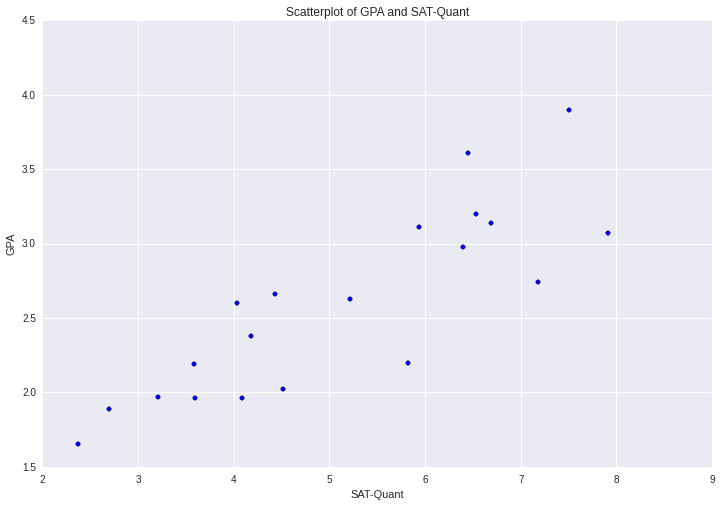

In [23]:
plt.scatter(df['SAT_QUAN'], df['GPA'])
plt.title('Scatterplot of GPA and SAT-Quant')
plt.xlabel('SAT-Quant')
plt.ylabel('GPA');

We first notice that there are not any extreme outliers, further that there doesn't appear to be a strong indication of different populations (clustering). We observe that if we were to draw a line that would be an attempt at 'fit by hand', it would observe a generally positive trend between SAT-Quant. and GPA.

### Part B:
Using the formulas for a two-variable OLS regression model, compute the slope and intercept for the follwoing model: $GPA = \alpha + \beta_1(\text{SAT-Quant})$.

__Answer__: Using the formula $$\hat{\beta_1} = \frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sum_{i=1}^n(X_i-\bar{X})^2}$$

In [24]:
x = df['SAT_QUAN'][:8].tolist()
y = df['GPA'][:8].tolist()
x_mean = np.mean(x)
y_mean = np.mean(y)

beta_hat = sum((a - x_mean)*(b - y_mean) for a,b in zip(x,y)) / sum(np.square(a - x_mean) for a in x)
print(beta_hat)

0.239175919707


We will also compute the intercept using the formula: $$\hat{\alpha} = \bar{Y} - \hat{\beta_1}\bar{X}$$

In [25]:
alpha_hat = y_mean - beta_hat * x_mean
print(alpha_hat)

1.29396628773


### Part C:
Compute the predicted values, the residuals, the Sum of Square Errors (SSE), and the $R^2$ for the model.

We will compute the predicted values by using our regression equation and computed parameters above, in the equation: $$GPA = 1.2939 + 0.2391 (\mbox{SAT-Quant})$$

In [26]:
y_hat = [(1.2939 + 0.2391 * a) for a in x]
print(y_hat)

[2.0614110000000001, 3.0106380000000001, 2.1498780000000002, 2.2574730000000001, 2.8241399999999999, 1.8605670000000001, 1.93947, 2.2933379999999999]


We will compute residuals using the formula: $$R_i = Y_i - \hat{Y}$$

In [27]:
r = [a - b for a,b in zip(y, y_hat)]
print(r)

[-0.091411000000000131, -0.27063799999999993, 0.040121999999999769, 0.34252700000000003, 0.15586000000000011, -0.21056700000000017, -0.049470000000000125, 0.086662000000000017]


We will compute the Sum of Square Errors (SSE) using the formula: $$SSE = \sum_{i=1}^n(Y_i - \hat{Y_i})^2$$

In [28]:
sse = sum([np.square(a - b) for a,b in zip(y, y_hat)])
print(sse)

0.279123802811


We will compute the $R^2$ using the formula: $$R^2 = 1- \frac{SSE}{SST}$$ where SSE is enumerated above and SST is: $$SST = \sum_i^n(Y_i - \bar{Y})^2$$

In [29]:
sst = sum([np.square(a - y_mean) for a in y])
r_square = 1 - sse / sst
print(r_square)

0.809341664747


### Part D:
Plot the residuals (y-axis) by the predicted values (x-axis) and comment about what you see

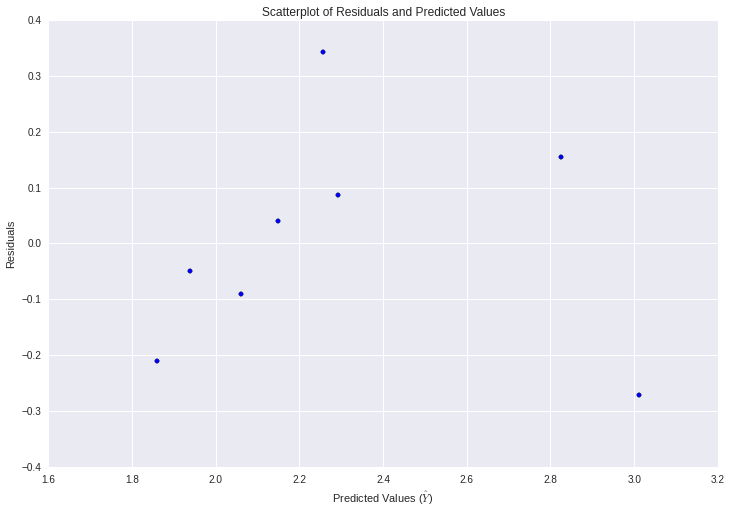

In [30]:
plt.scatter(y_hat, r)
plt.title('Scatterplot of Residuals and Predicted Values')
plt.xlabel('Predicted Values ($\hat{Y}$)')
plt.ylabel('Residuals');

We use this plot to eek out whether we believe that there exists heteroscedastic errors. In this case, we're seeing (in the sample of 8) that there is a fan shape starting in the bottom left and expanding rightward. This is a pretty early projection of what we 'see' in the data because there are only a few points. We'd want to run our regression on more data before we felt confident that we detected heteroscedasticity.

## Question 2:
The data set GPA is available in SPSS, Stata, and SAS formats. It contains all 20 observations from the sample of college students. We'll use it to conduct the remaining excercises.

### Part A:
Estimate an OLS regression model with GPA as the dependent variable and SAT-Quant. as the independent variable. Compare this model to the model you estimated in Excercise 1. In what ways are they similar or different?

In [31]:
y, X = dmatrices('GPA ~ SAT_QUAN', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     46.68
Date:                Sun, 23 Aug 2015   Prob (F-statistic):           2.15e-06
Time:                        12:19:31   Log-Likelihood:                -5.5719
No. Observations:                  20   AIC:                             15.14
Df Residuals:                      18   BIC:                             17.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9670      0.250      3.874      0.0

We'll compare the OLS that was performed by the computer, with ours by hand below:

| Diagnostic | Computer | Hand |
|:----------:|:--------:|:----:|
| $\beta$ | 0.3178 | 0.2391 |
| $\alpha$ | 0.9670 | 1.2939 |
| $R^2$ | 0.722 | 0.8093 |

We believe that if we'd adjust the computer (which we did to test our calculations) to only sample 8 of the 20 records, we would get the same values. We see there is a difference in all of the values, naturally this is occuring because we're calculating from two different sets of data. We see that the initial $\beta$ value for the subset has a lower rate of change than the greater set.

## Question 3:
Estimate the following three OLS regression models, all of which use GPA as the dependent variable:

### Part A:
Use only HS_ENGL as the independent variable

In [32]:
y, X = dmatrices('GPA ~ HS_ENGL', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     10.47
Date:                Sun, 23 Aug 2015   Prob (F-statistic):            0.00458
Time:                        12:19:31   Log-Likelihood:                -13.777
No. Observations:                  20   AIC:                             31.55
Df Residuals:                      18   BIC:                             33.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2487      0.733      0.339      0.7

### Part B:
Use HS_ENGL and SAT_VERB as the independent variables

In [33]:
y, X = dmatrices('GPA ~ HS_ENGL + SAT_VERB', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     10.90
Date:                Sun, 23 Aug 2015   Prob (F-statistic):           0.000898
Time:                        12:19:31   Log-Likelihood:                -10.109
No. Observations:                  20   AIC:                             26.22
Df Residuals:                      17   BIC:                             29.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0572      0.638     -0.090      0.9

### Part C:
Use HS_ENGL, SAT_VERB, and SAT_QUAN as the independent variables

In [34]:
y, X = dmatrices('GPA ~ HS_ENGL + SAT_VERB + SAT_QUAN', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     22.89
Date:                Sun, 23 Aug 2015   Prob (F-statistic):           4.95e-06
Time:                        12:19:31   Log-Likelihood:                -1.7007
No. Observations:                  20   AIC:                             11.40
Df Residuals:                      16   BIC:                             15.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4863      0.448      1.086      0.2

## Question 4:

### Part A:
Interpret the unstandardized coefficient associated with HS_ENGL from model 3(a). 

__Answer__: Model 3(a) was: $$GPA = 0.2487 + 0.7790 (\mbox{HS_ENGL})$$

Controlling for the effects of the other independent variables (in this case, there were no other independent variables in the model), we expect a one unit increase in HS_ENGL to be associated with a 0.779 increase in GPA.

### Part B:
Interpret the unstandardized coefficient associated with SAT_QUAN from model 3(c).

__Answer__: Model 3(c) was: $$GPA = 0.4863 + 0.0111 (\mbox{HS_ENGL} + 0.1568 (\mbox{SAT_VERB}) + 0.2586 (\mbox{SAT_QUAN})$$

Controlling for the effects of the other independent variables in the model, we expect a one unit increase in SAT_QUAN to be associated with a 0.2586 increase in GAP.

### Part C:
Interperate the $R^2$ from model 3(c):

__Answer__: The $R^2$, also known as the _coefficient of determination_ shows the proportion of variability in the dependent variable that is explained by the model. In the case of the model above, 81% of the variability in GPA is explained by the model.

## Question 5:
Something happened to the association between HS_ENGL and GPA as we moved from model (a) to model (c). Please describe what might have happened. Remember to provide statistical evidence to support your answer. Speculate in a conceptual way why this may have happened.

__Answer__: In model 3(a) HS_ENGL had the coefficient 0.7790, where as in model 3(c) HS_ENGL had the coefficient 0.0111. We see that there is a significant change in the magnitude of this coefficient. Between model 3(a) and 3(c) we added two more independent variables. We can't simply compare the magnitude of these numbers, as they are derived from two different models. We could, if we didn't want to do further work, simply look at the significance of these two coefficients in their respective models and comment:

| Diagnostic | Model 3(a) | Model 3(c) |
|:----------:|:----------:|:----------:|
| $T$ | 3.236 | 0.059 |
| $P>|t|$ | 0.005 | 0.954 |

Firs thing we notice is that the p-value in model 3(c) is not significant, where as the p-value in 3(a) is significant. We briefly looked into using mediation analysis, which is within our statistical package, but think that its beyond the scope of this asignment.

## Question 6:
Using model 3(c), check the following regression diagnostics and comment about any problems with the model:

### Part A:
A normal probability plot of the residuals.

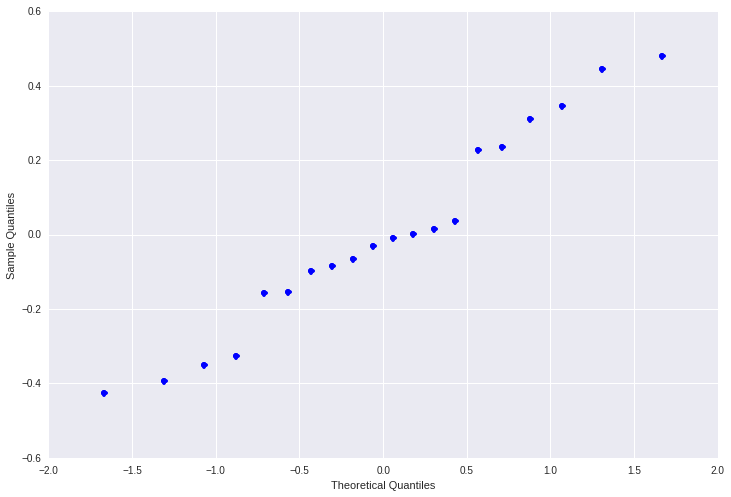

In [35]:
res = results.resid
probplot = sm.ProbPlot(res)
probplot.qqplot();

When examining the Q-Q plot, we're comparing two distributions. In this case we see generally that the plot is moving along the $y = x$ diagonal.

### Part B:
A Plot of the residuals by the predicted values. You may wish to use studentized residuals and standardized predicted values in the plot.

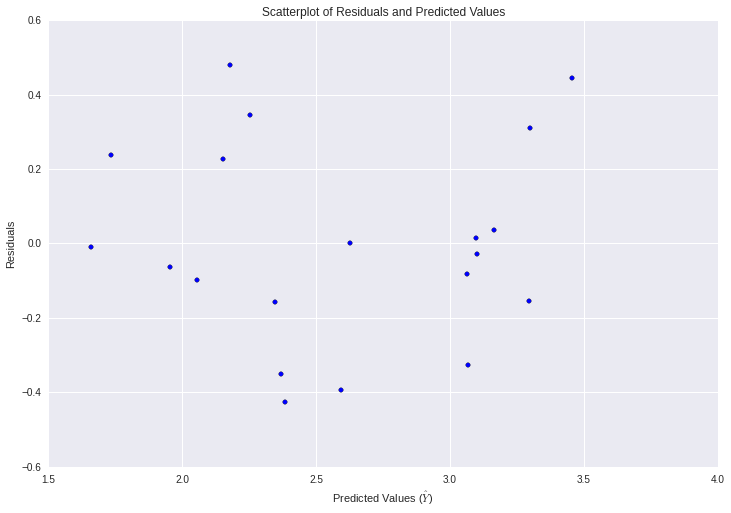

In [36]:
eng = df['HS_ENGL'].tolist()
ver = df['SAT_VERB'].tolist()
quan = df['SAT_QUAN'].tolist()
y_hat = [(0.4863 + 0.0111 * a + 0.1568 * b + 0.2586 * c) for a, b, c in zip(eng, ver, quan)]

plt.scatter(y_hat, res)
plt.title('Scatterplot of Residuals and Predicted Values')
plt.xlabel('Predicted Values ($\hat{Y}$)')
plt.ylabel('Residuals');

We use this plot to eek out whether we believe that there exists heteroscedastic errors. We don't think we're seeing any heteroscedasticity here.

### Part C:
A distribution of the standardized (or studentized) residuals, the leverage values, and the Cook's D values.

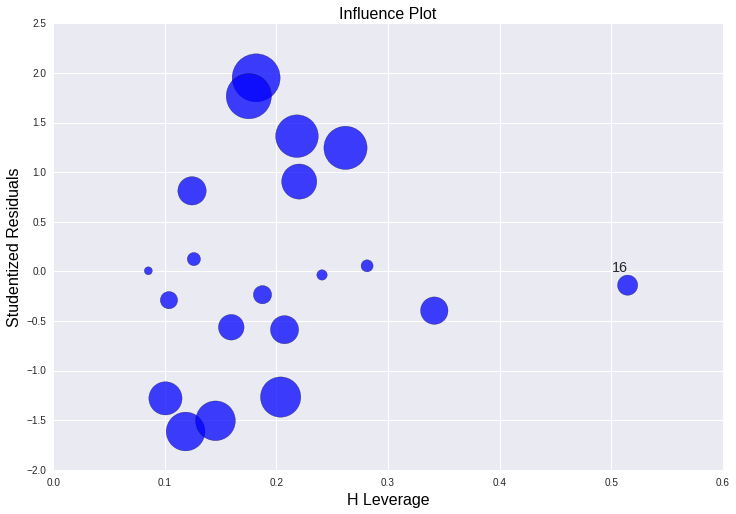

In [37]:
sm.graphics.influence_plot(results, criterion="cooks");

In this plot we see strong indication of multiple sub-populations in the data set. Specifically the two clusters top and bottom that are excerting a greater influence.